# Import Data

In [1]:
import pandas as pd
import numpy as np
np.random.seed(42)
IBMData = pd.read_csv('C:\\Users\\Joyce\\Desktop\\Emory MSBA\\Intro to BA\\IBM Project\\IBM-HR-Employee-Attrition.csv')


IBMData['Attrition'] = IBMData['Attrition'].map({'Yes': 1, 'No': 0})

#Remove unvalue attritbues
IBMData = IBMData.drop(columns=['EmployeeNumber','StandardHours','Over18','EmployeeCount','Department','EducationField',
                               'Gender','JobRole','YearsWithCurrManager'])

#Some attributes are numerical in the dataset, but actually they are categorical 
IBMData['Education']=pd.Categorical(IBMData.Education)
IBMData['EnvironmentSatisfaction']=pd.Categorical(IBMData.EnvironmentSatisfaction)
IBMData['JobInvolvement']=pd.Categorical(IBMData.JobInvolvement)
IBMData['JobLevel']=pd.Categorical(IBMData.JobLevel)
IBMData['JobSatisfaction']=pd.Categorical(IBMData.JobSatisfaction)
IBMData['PerformanceRating']=pd.Categorical(IBMData.PerformanceRating)
IBMData['RelationshipSatisfaction']=pd.Categorical(IBMData.RelationshipSatisfaction)
IBMData['WorkLifeBalance']=pd.Categorical(IBMData.WorkLifeBalance)
IBMData['StockOptionLevel']=pd.Categorical(IBMData.StockOptionLevel)

# Data Processing and Preparation

In [2]:
IBMData['BusinessTravel'] = IBMData['BusinessTravel'].map({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2})
IBMData['MaritalStatus'] = IBMData['MaritalStatus'].map({'Single': 0, 'Married': 1, 'Divorced': 2})
IBMData['OverTime'] = IBMData['OverTime'].map({'No': 0, 'Yes': 1})


FEATURE_NAMES = ['Age',
 'BusinessTravel',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'HourlyRate',
 'JobLevel',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'StockOptionLevel',
'TotalSatisfaction',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole', 
 'DistanceFromHome',
 'YearsSinceLastPromotion'
 ]

## Feature Engineering

In [3]:
IBMData['TotalSatisfaction'] = IBMData.loc[:, ['EnvironmentSatisfaction','JobInvolvement','JobSatisfaction',
                                              'RelationshipSatisfaction','WorkLifeBalance']].sum(axis=1)
IBMData['TotalSatisfaction'].describe()

#Declare X and y
X = IBMData[['Age',
 'BusinessTravel',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'HourlyRate',
 'JobLevel',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'StockOptionLevel',
 'TotalSatisfaction',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
'DistanceFromHome',
 'YearsSinceLastPromotion'
]].values
y = IBMData['Attrition'].values

## Balance Target Variable

In [4]:
from sklearn.utils import resample

# Number of class 1 samples before
print('Number of class 1 (Attrition) samples before:', X[y == 1].shape[0])

X_upsampled, y_upsampled = resample(X[y == 1], # Indexable data-structures as input
                                    y[y == 1],
                                    replace=True,      # Implements resampling with replacement.
                                    n_samples=X[y == 0].shape[0], # Number of samples to generate i.e., 357
                                    random_state=42) # The seed of the pseudo random number generator to use when shuffling the data

# Number of class 1 samples after oversampling rare class
print('Number of class 1 (Attrition) samples after:', X_upsampled.shape[0])

Number of class 1 (Attrition) samples before: 237
Number of class 1 (Attrition) samples after: 1233


In [5]:
# After resampling, we can stack the original class 0 with the upsampled class 1 subset to obtain a balanced dataset
# as follows:

X = np.vstack((X[y == 0], X_upsampled))
y = np.hstack((y[y == 0], y_upsampled))

# Consequently if we were to predict the accuracy of the model that always predicts the majority class ~50%
y_pred = np.zeros(y.shape[0])
np.mean(y_pred == y) * 100

50.0

In [15]:
############################################## Split the Data ##############################################
np.random.seed(42)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

############################################# Normalization #############################################

from  warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
import warnings
warnings.filterwarnings('always')  # "error", "ignore", "always", "default", "module" or "once"
warnings.filterwarnings('ignore')


from sklearn.preprocessing import StandardScaler # Standardize features by removing the mean and scaling to unit variance

sc = StandardScaler()
sc.fit(X_train) # Compute the mean and std to be used for later scaling.

X_train_std = sc.transform(X_train) # Perform standardization of train set X by centering and scaling
X_test_std = sc.transform(X_test) # Perform standardization of test set Xby centering and scaling

# Decision Tree Model Building

In [7]:
############################################# Normalization #############################################
from  warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
import warnings
warnings.filterwarnings('always')  # "error", "ignore", "always", "default", "module" or "once"
warnings.filterwarnings('ignore')


from sklearn.preprocessing import StandardScaler # Standardize features by removing the mean and scaling to unit variance

sc = StandardScaler()
sc.fit(X_train) # Compute the mean and std to be used for later scaling.

X_train_std = sc.transform(X_train) # Perform standardization of train set X by centering and scaling
X_test_std = sc.transform(X_test) # Perform standardization of test set Xby centering and scaling

## Cross Validation Estimation

In [23]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
clf_dt = DecisionTreeClassifier() 
############################ Performance w/ Cross Validation ############################

scores=cross_val_score(clf_dt, X=X, y=y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores) # print accuracy for each iteration of cross-validation


scores_f1=cross_val_score(clf_dt, X=X, y=y, cv=10, scoring='f1_macro')
print("F1-score: %0.2f (+/- %0.2f)" % (scores_f1.mean(), scores_f1.std() * 2))
print(scores_f1) # print f1-score for each iteration of cross-validation

Accuracy: 0.93 (+/- 0.03)
[0.92 0.94 0.95 0.95 0.95 0.93 0.92 0.91 0.93 0.95]
F1-score: 0.93 (+/- 0.02)
[0.92 0.93 0.94 0.94 0.94 0.93 0.92 0.92 0.93 0.94]


## Learning Curve

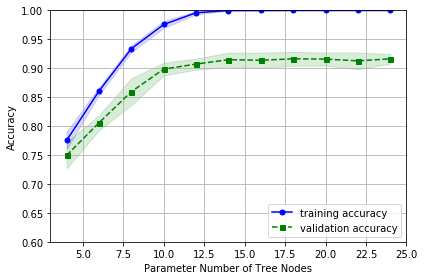

In [9]:
from sklearn.model_selection import validation_curve

############################# Parameters - Varying Complexity #############################

param_range = [4,6,8,10,12,14,16,18,20,22,24]

########################## Estimate Scores - Varying Complexity ##########################

# Determine training and test scores for varying parameter values.
train_scores, test_scores = validation_curve( 
                estimator=DecisionTreeClassifier(),
                X=X_train, 
                y=y_train, 
                param_name="max_depth", 
                param_range=param_range,
                cv=5,     
                scoring="accuracy", 
                n_jobs=4) 

# Cross validation statistics for training and testing data (mean and standard deviation)
train_mean = np.mean(train_scores, axis=1) # Compute the arithmetic mean along the specified axis.
train_std = np.std(train_scores, axis=1)   # Compute the standard deviation along the specified axis.
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

############################## Visualization - Fitting Graph ##############################

# Plot train accuracy means of cross-validation for all the parameters C in param_range
plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

# Fill the area around the line to indicate the size of standard deviations of performance for the training data
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

# Plot test accuracy means of cross-validation for all the parameters C in param_range
plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

# Fill the area around the line to indicate the size of standard deviations of performance for the test data
plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

# Grid and Axes Titles
plt.grid()
#plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter Number of Tree Nodes')
plt.ylabel('Accuracy')
plt.ylim([0.6, 1.0]) # y limits in the plot
plt.tight_layout()
# plt.savefig('Fitting_graph_LR.png', dpi=300)
plt.show()           # Display the figure

## Grid Search Parameter Tuning With Nested Cross Validation

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler

np.random.seed(42)

inner_cv = KFold(n_splits=5, shuffle=True)
outer_cv = KFold(n_splits=5, shuffle=True)

# Choosing optimal depth of the tree: Basic Model
gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}],
                  scoring='accuracy', # Specifying f1 score for evaluation
                  cv=inner_cv)

gs = gs.fit(X,y)
print("Decision Tree Parameter Tuning #1")
print("Non-nested CV Accuracy: ", gs.best_score_)
print("Optimal Parameter: ", gs.best_params_)   
print("Optimal Estimator: ", gs.best_estimator_) 
nested_score_gs = cross_val_score(gs, X=X, y=y, cv=outer_cv)
print("Nested CV Accuracy: ",nested_score_gs.mean(), " +/- ", nested_score_gs.std())


gs_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                  param_grid=[{'max_depth': [10,11,12,13,14,15,16,17, None], 'criterion':['gini','entropy'], 
                               'splitter':['best','random'],
                               'min_samples_leaf':[1,2,3,4,5],
                               'min_impurity_decrease':[0.00001,0.0001,0.001],
                               'min_samples_split':[2,3,4,5]}],
                  scoring='accuracy', # Specifying f1 score for evaluation
                  cv=inner_cv,
                  n_jobs=4)

gs_dt = gs_dt.fit(X,y)
print("\n Decision Tree Parameter Tuning #2")
print("Non-nested CV Accuracy Score: ", gs_dt.best_score_)
print("Optimal Parameter: ", gs_dt.best_params_)
print("Optimal Estimator: ", gs_dt.best_estimator_)
nested_score_gs_dt = cross_val_score(gs_dt, X=X, y=y, cv=outer_cv)
print("Nested CV Accuracy Score: ",nested_score_gs_dt.mean(), " +/- ", nested_score_gs_dt.std())

## Optimal Model with Accuracy and AUC Score

In [10]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=16,
            max_features=None, max_leaf_nodes=None, 
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='random'
            )
y_pred = clf.fit(X_train, y_train).predict(X_test)

#Predictive Accuracy 
import sklearn.metrics as metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
clf_labels = ['Decision tree']


Accuracy: 0.9473684210526315


In [11]:
#################################### Cross - Validation In AUC Score ####################################

print('10-fold cross validation:\n')
for clf, label in zip([clf], clf_labels): #For all classifiers 
    scores = cross_val_score(estimator=clf,  #Estimate AUC based on cross validation
                             X=X,
                             y=y,
                             cv=10,
                             scoring='roc_auc')
    print("ROC AUC: %0.3f (+/- %0.3f) [%s]" #Print peformance statistics based on cross-validation
          % (scores.mean(), scores.std(), label))

10-fold cross validation:

ROC AUC: 0.929 (+/- 0.016) [Decision tree]


## Evaluate the Tree with Confusion Matrix and Other Metrics

1 [0. 1.] 1.0
Normalized confusion matrix
[[0.89 0.11]
 [0.   1.  ]]


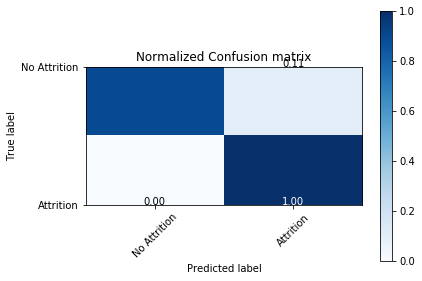

Accuracy (out-of-sample): 0.947
F1 score (out-of-sample): 0.947
              precision    recall  f1-score   support

   Attrition       1.00      0.89      0.94       247
No Attrition       0.90      1.00      0.95       247

   micro avg       0.95      0.95      0.95       494
   macro avg       0.95      0.95      0.95       494
weighted avg       0.95      0.95      0.95       494



In [21]:
################################### Evaluate the Decision Tree Model ##################################
#confusion matrix

# Plot non-normalized confusion matrix
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import accuracy_score, f1_score, classification_report
import matplotlib.pyplot as plt

y_pred = clf.predict(X_test)             # Classification prediction
y_pred_prob = clf.predict_proba(X_test)  # Class probabilities
y_pred_insample = clf.predict(X_train)
print(y_pred[0], y_pred_prob[0], np.sum(y_pred_prob[0]))


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix to evaluate the accuracy of a classification    
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No Attrition','Attrition'], normalize=True,
                      title='Normalized Confusion matrix')
plt.show()

# Accuracy
print('Accuracy (out-of-sample): %.3f' % accuracy_score(y_test, y_pred))

# F1 score
print('F1 score (out-of-sample): %.3f' %  f1_score(y_test, y_pred, average='macro'))


# Build a text report showing the main classification metrics (out-of-sample performance)
print(classification_report(y_test, y_pred, target_names=['Attrition','No Attrition']))

# Visualization of the Decision Tree

In [ ]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"

# Define path of an image
# Function that takes as input fig_id and returns back the image path
def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

# Save image in a specific path
# Function that takes as input fig_id and saves the image in a specific format (i.e., png, 300 dpi)
def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)

In [ ]:
!dot -Tpng IBMFinal_tree.dot -o IBMFinal_tree.png

In [ ]:
######################################### Imports #########################################

from sklearn.tree import export_graphviz
# If you don't have graphviz package, you need to install it https://anaconda.org/anaconda/graphviz
# How to install Graphviz with Anaconda https://anaconda.org/anaconda/graphviz
# conda install -c anaconda graphviz 

from IPython.display import Image
import os
# ATTENTION: You need to change the working directory
# For instance, when running the script on my local computer, I had to change it to:
# os.chdir("/Users/vtodri/Dropbox/Vilma/Teaching/Emory/Fall/MSBA/Lectures/Week 2")
os.chdir("C:\\Users\\Joyce\\Desktop\\Emory MSBA\\Intro to BA\\IBM Project")

# make the images and decision_trees path in order for image_path to work
if not os.path.exists('./images/decision_trees'):
    os.makedirs('./images/decision_trees')
# You can visualize the trained Decision Tree by first using the export_graphviz()
# method to output a graph definition file called iris_tree.dot

################################# Visualization of Decision Tree ##########################

export_graphviz(
        clf,
        out_file=image_path("IBMFinal_tree.dot"),
        feature_names=FEATURE_NAMES,
        class_names=["No Attrition","Attrition"],
        rounded=True,
        filled=True
    )

# Then you can convert this .dot file to a variety of formats such as PDF or PNG using
# the dot command-line tool from the graphviz package.

# change working directory again to where the iris_tree.dot file will be made
# set the working directory to be within the newly created ./images/decision_trees
os.chdir("./images/decision_trees")

# Note: Graphviz is an open source graph visualization software package, available at http://www.graphviz.org/
# Converting .dot file to PNG Example: Run command "dot -Tpng iris_tree.dot -o iris_tree.png" in the terminal after installing graphviz package 
# and making sure you are in the right directory (same directory as the .dot file)

#print(os.getcwd())
path_png = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, "IBMFinal_tree.png")
Image(filename="IBMFinal_tree.png")

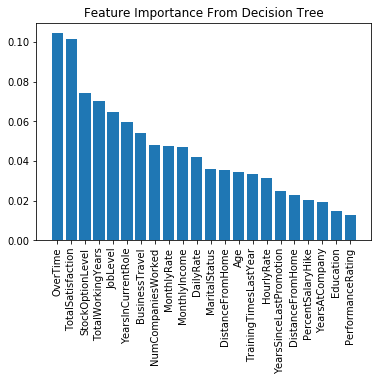

In [31]:
###Visualize the feature importance based on the tree
import matplotlib.pyplot as plt
clf.fit(X,y)
importance = clf.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importance)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [FEATURE_NAMES[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance From Decision Tree")

# Add bars
plt.bar(range(X.shape[1]), importance[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()

# Cumulative Gains Curve

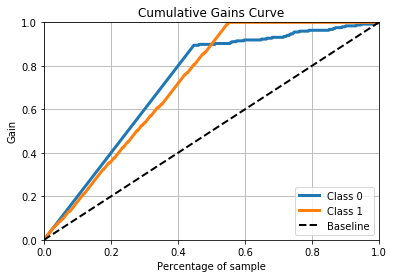

In [24]:
import scikitplot as skplt
# Deriving Class probabilities
predicted_probabilities = clf.predict_proba(X_test)
# Creating the plot
skplt.metrics.plot_cumulative_gain(y_test, predicted_probabilities)


#skplt.metrics.plot_cumulative_gain(true_values, predictions)
#plt.show()

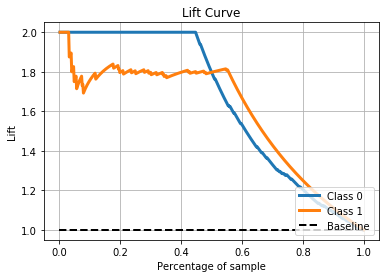

In [27]:
#Scikitplot library is there to help
skplt.metrics.plot_lift_curve(y_test, predicted_probabilities)

10-fold cross validation:

ROC AUC: 0.93 (+/- 0.02) [Decision Tree]


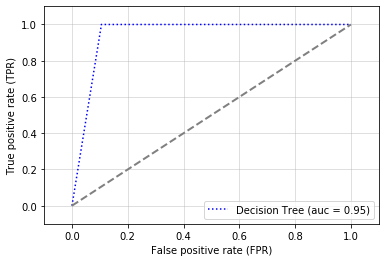

In [30]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
import matplotlib.pyplot as plt

from  warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
import warnings
warnings.filterwarnings('always')  # "error", "ignore", "always", "default", "module" or "once"
warnings.filterwarnings('ignore')


# Label the classifiers
clf_labels = ['Decision Tree']
all_clf = [clf]

# Cross - Validation 
print('10-fold cross validation:\n')
for clf, label in zip([clf], clf_labels): 
    scores = cross_val_score(estimator=clf,  
                             X=X,
                             y=y,
                             cv=10,
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

#Visualization

colors = ['blue']     
linestyles = [':', '--', '-.', '-']        
for clf, label, clr, ls in zip(all_clf,
               clf_labels, colors, linestyles):

    
    y_pred = clf.fit(X_train,
                     y_train).predict_proba(X_test)[:, 1] 
    fpr, tpr, thresholds = roc_curve(y_true=y_test, 
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)               
    plt.plot(fpr, tpr,                         
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')    
plt.plot([0, 1], [0, 1], 
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])   
plt.ylim([-0.1, 1.1])   
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')

plt.show()